In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(palette='dark')

# Aulas

In [8]:
df_vinhos = pd.read_csv('Dados/Desafio-tabela-Anliseunivariadadedados-modificado.csv')
df_vinhos = df_vinhos.drop(df_vinhos.columns[0], axis=1)
df_vinhos

,pais,descricao,designacao,pontos,preco,provincia,regiao_1,regiao_2,variedade,adega
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
156,France,"This well-balanced, fruity wine allows space f...",NaN,89,20.0,Southwest France,Cahors,NaN,Bordeaux-style Red Blend,Chateau Quattre
157,US,"In this fruit-forward vintage, it's not surpri...",NaN,89,24.0,Oregon,Rogue Valley,Southern Oregon,Sangiovese,Ledger David
158,Spain,"Aromas of leather, roast plum and compost are ...",Viña Real Gran Reserva,89,44.0,Northern Spain,Rioja,NaN,Tempranillo,CVNE
159,Chile,"Staunch berry, cassis and spice aromas are fri...",Fina Reserva Ensamblaje Malbec-Cabernet Sauvig...,89,19.0,Colchagua Valley,NaN,NaN,Red Blend,Estampa


In [9]:
top_paises = df_vinhos['pais'].value_counts().nlargest(3).index

df_vinhos['pais_agrupado'] = df_vinhos['pais'].apply(lambda x: x if x in top_paises else 'Outros')

cores = {
    top_paises[0]: 'red',
    top_paises[1]: 'green',
    top_paises[2]: 'blue',
    'Outros': 'gray'
}

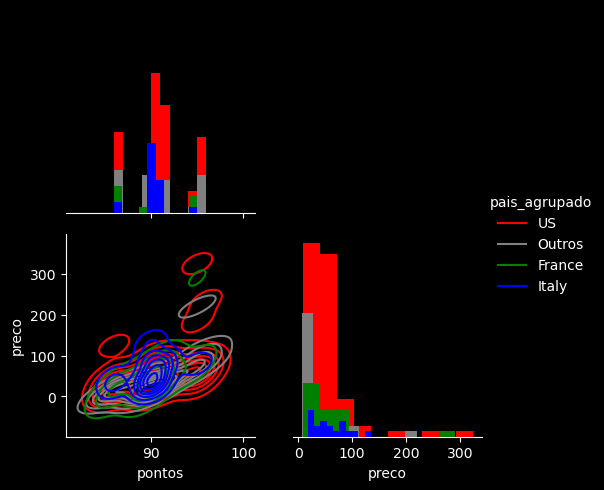

In [ ]:
grid = sns.PairGrid(
    data=df_vinhos,
    hue='pais_agrupado',
    palette=cores,
    corner=True
)
grid = grid.map_upper(plt.scatter)
grid = grid.map_diag(plt.hist)
grid = grid.map_lower(sns.kdeplot).add_legend()
plt.show()

In [11]:
df_gorjetas = sns.load_dataset('Tips')
df_gorjetas

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


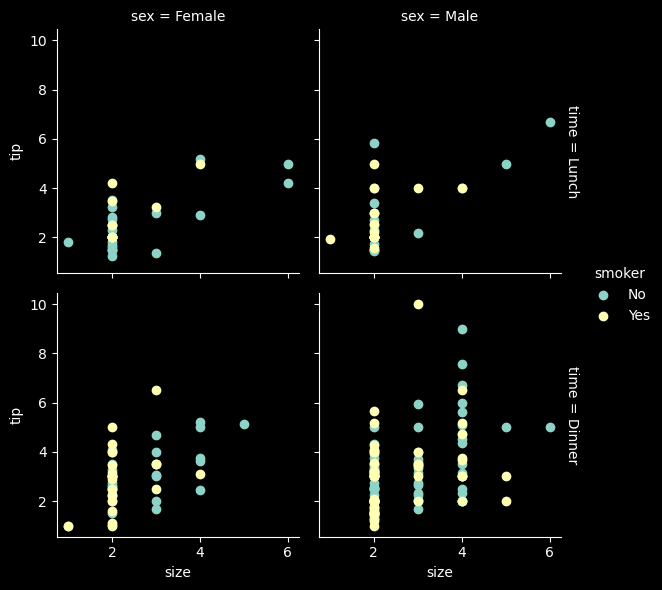

In [12]:
dias_ordenados = ['Lunch', 'Dinner']

facet = sns.FacetGrid(
    df_gorjetas,
    col='sex',
    row='time',
    hue='smoker',
    margin_titles=True,
    row_order=dias_ordenados
)
facet.map(plt.scatter, 'size', 'tip').add_legend()
plt.show()

In [13]:
df_students = pd.read_csv('Dados/StudentsPerformance.csv')
df_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


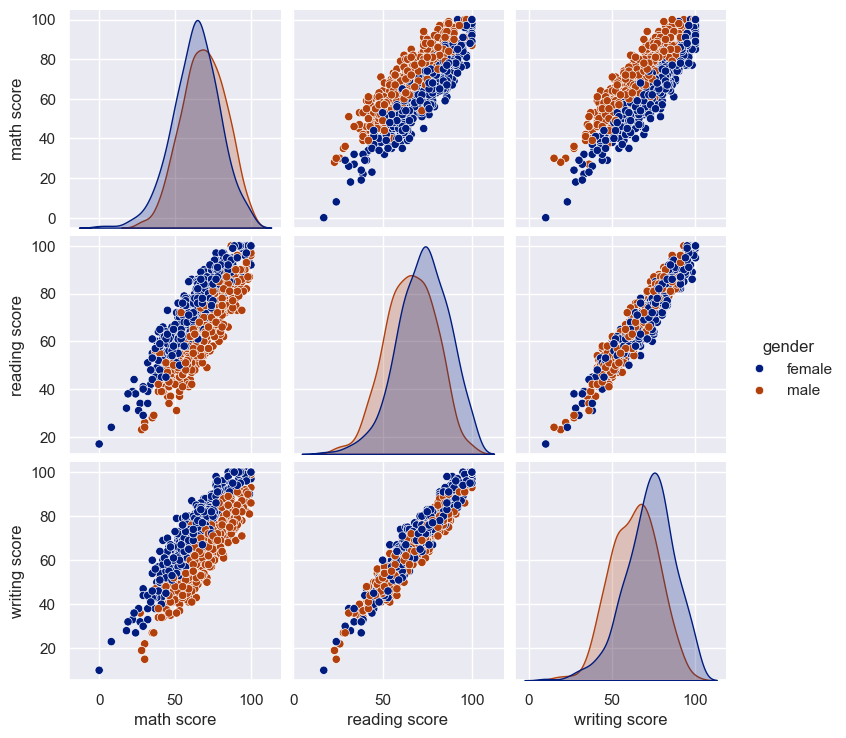

In [19]:
sns_plot = sns.pairplot(df_students, hue='gender')
plt.show()

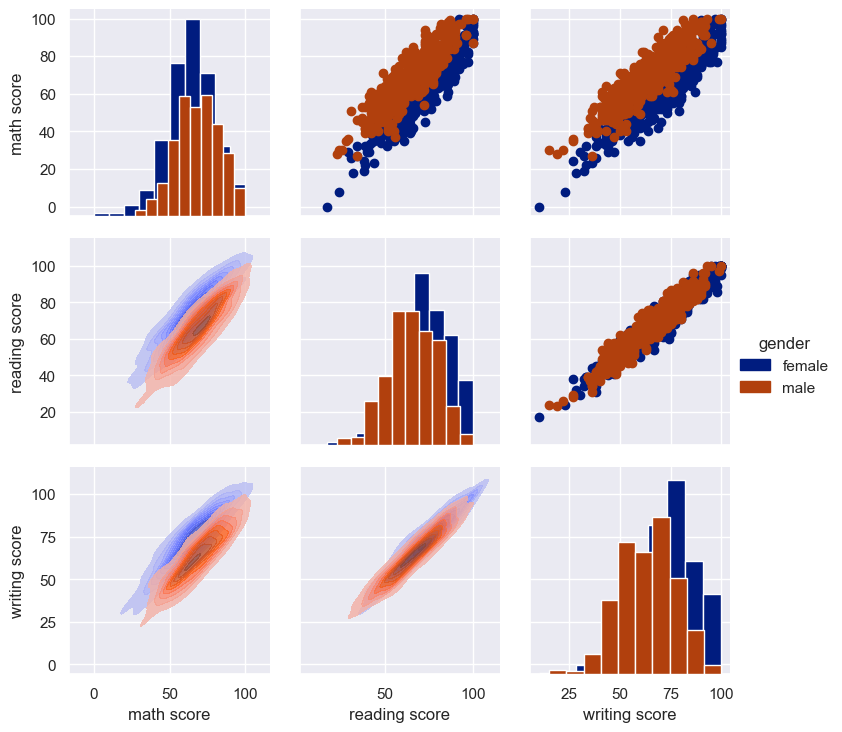

In [27]:
grid = sns.PairGrid(data=df_students, hue='gender')
grid.map_upper(plt.scatter)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot, fill=True, alpha=0.8)
grid.add_legend()
plt.show()

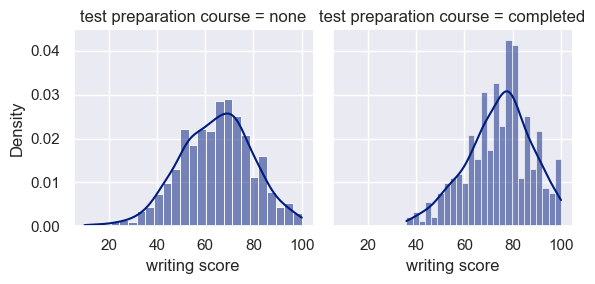

In [39]:
facet = sns.FacetGrid(df_students, col='test preparation course')
facet.map_dataframe(sns.histplot, x='writing score', kde=True, stat='density', bins=25)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


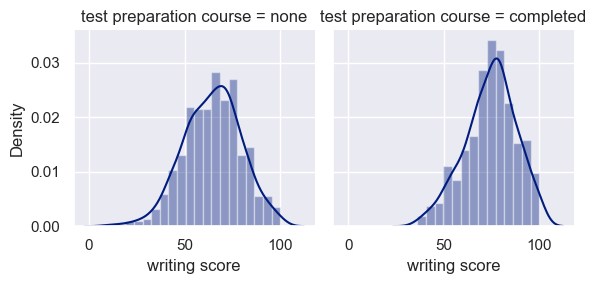

In [33]:
facet = sns.FacetGrid(df_students, col='test preparation course')
facet.map(sns.distplot, 'writing score')
plt.show()

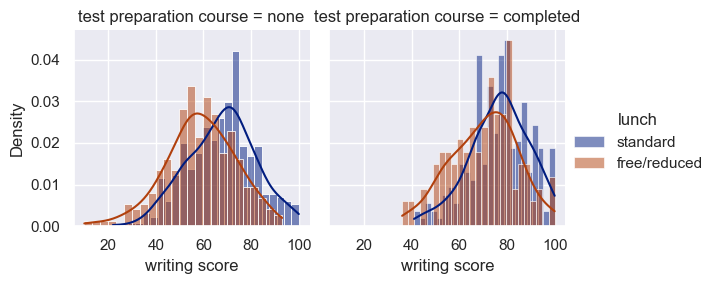

In [40]:
facet = sns.FacetGrid(df_students, col='test preparation course', hue='lunch')
facet.map_dataframe(sns.histplot, x='writing score', kde=True, stat='density', bins=25).add_legend()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\s

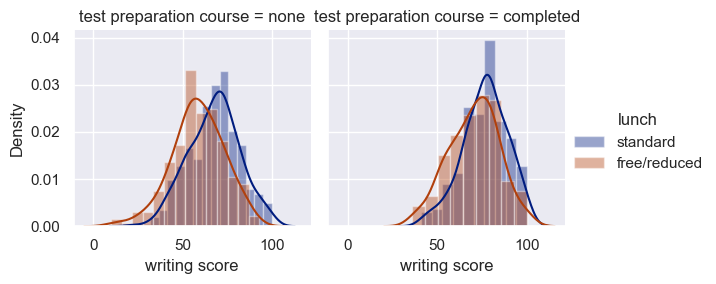

In [44]:
facet = sns.FacetGrid(df_students, col='test preparation course', hue='lunch')
facet.map(sns.distplot, 'writing score').add_legend()
plt.show()

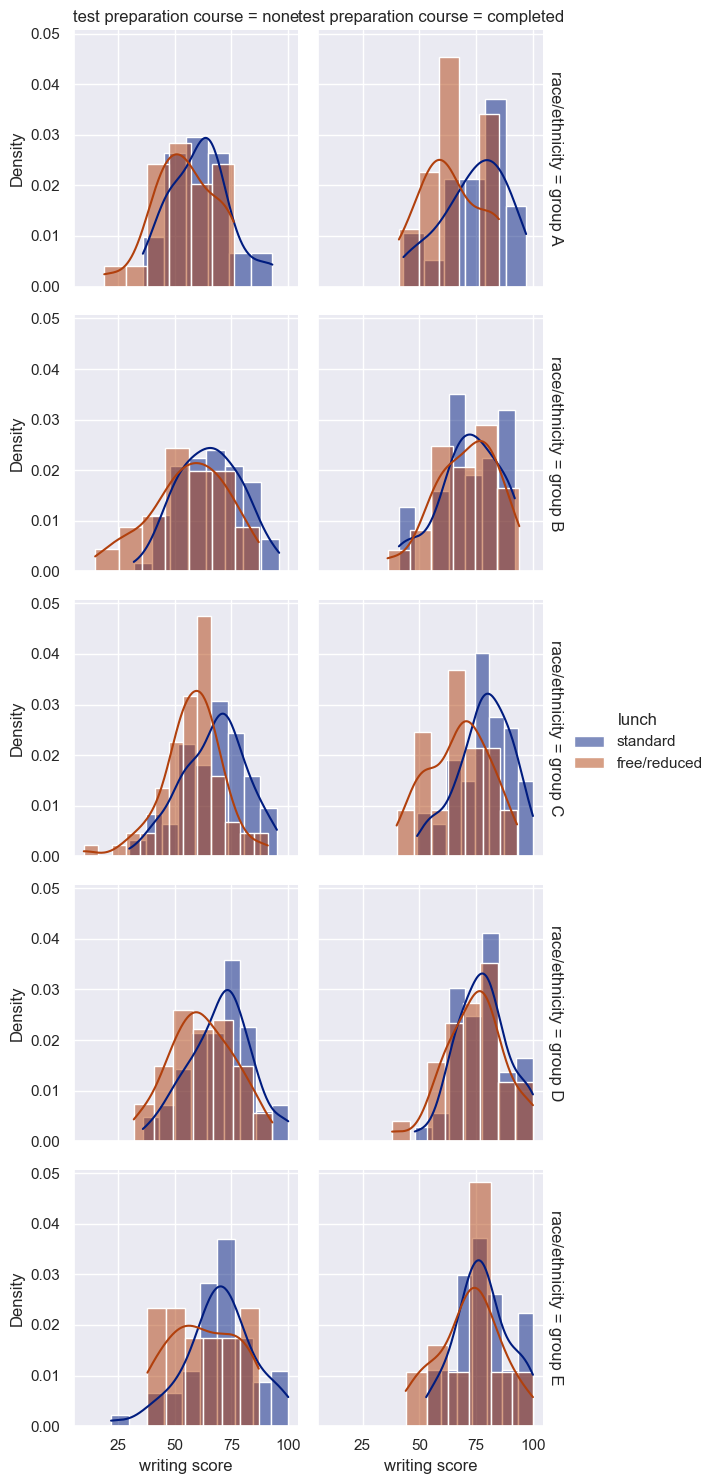

In [48]:
etnia = df_students['race/ethnicity'].unique().tolist()
etnia.sort()

df_students['race/ethnicity'] = pd.Categorical(df_students['race/ethnicity'], categories=etnia, ordered=True)

facet = sns.FacetGrid(df_students, col='test preparation course', row='race/ethnicity', hue='lunch', margin_titles=True)
facet.map_dataframe(sns.histplot, x='writing score', kde=True, stat='density').add_legend()
plt.show()

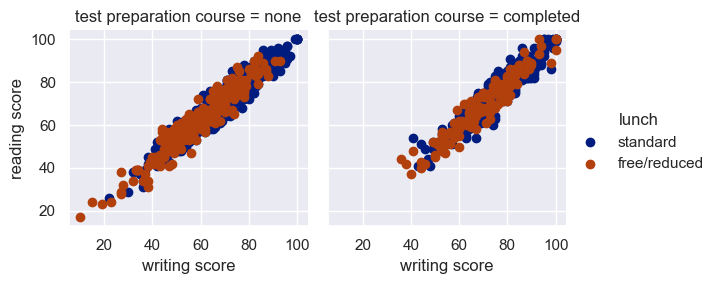

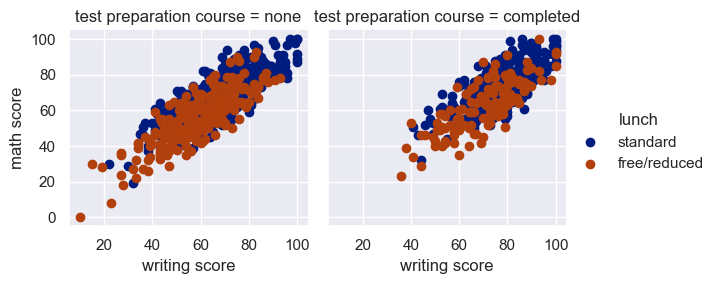

In [51]:
facet = sns.FacetGrid(df_students, col='test preparation course', hue='lunch')
facet.map(plt.scatter, 'writing score', 'reading score').add_legend()
facet = sns.FacetGrid(df_students, col='test preparation course', hue='lunch')
facet.map(plt.scatter, 'writing score', 'math score').add_legend()

plt.show()

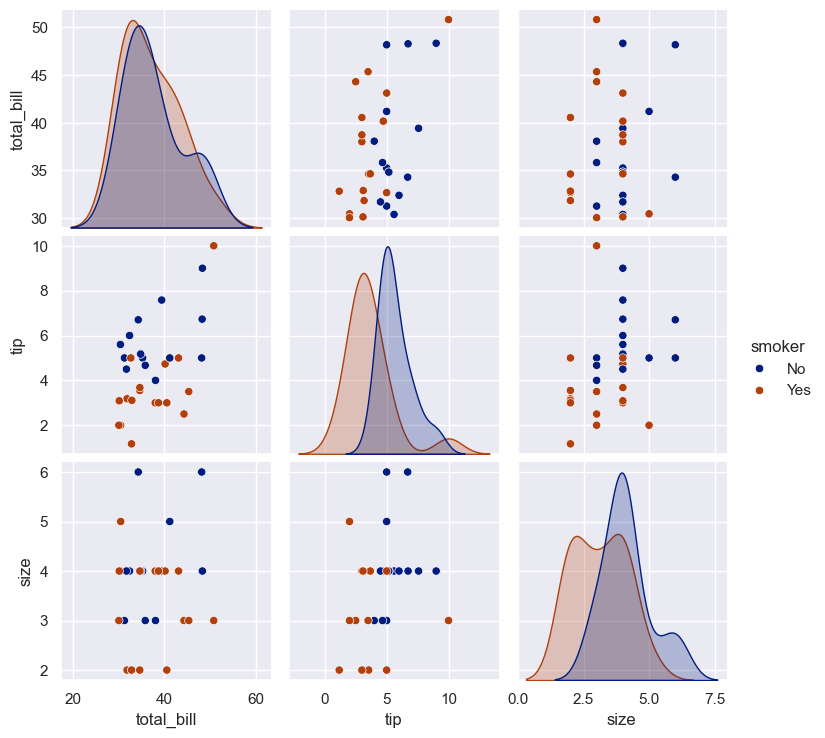

In [56]:
acima_de_30 = df_gorjetas[df_gorjetas['total_bill'] > 30]

grid = sns.pairplot(acima_de_30, hue='smoker')
plt.show()

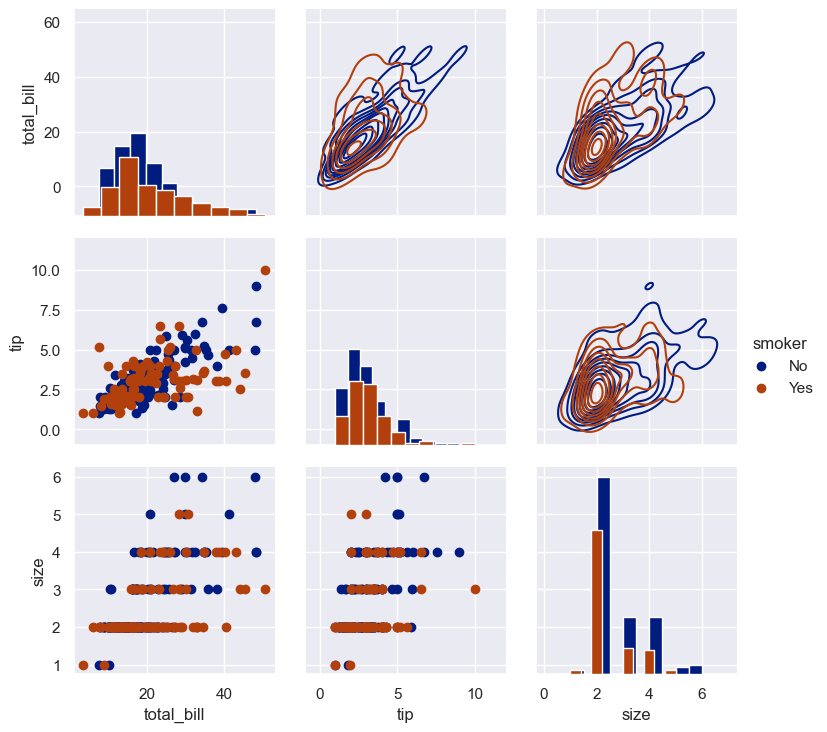

In [59]:
grid = sns.PairGrid(data=df_gorjetas, hue='smoker')
grid.map_upper(sns.kdeplot)
grid.map_diag(plt.hist)
grid.map_lower(plt.scatter).add_legend()

plt.show()

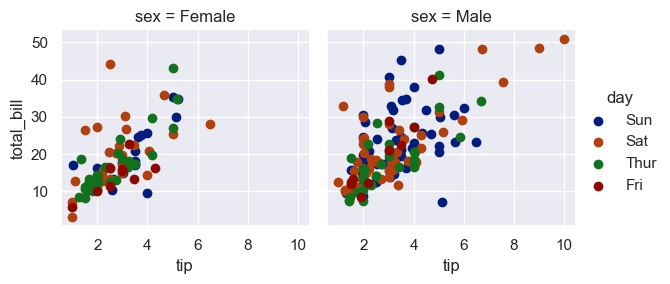

In [60]:
facet = sns.FacetGrid(df_gorjetas, col='sex', hue='day')
facet.map(plt.scatter, 'tip', 'total_bill').add_legend()
plt.show()

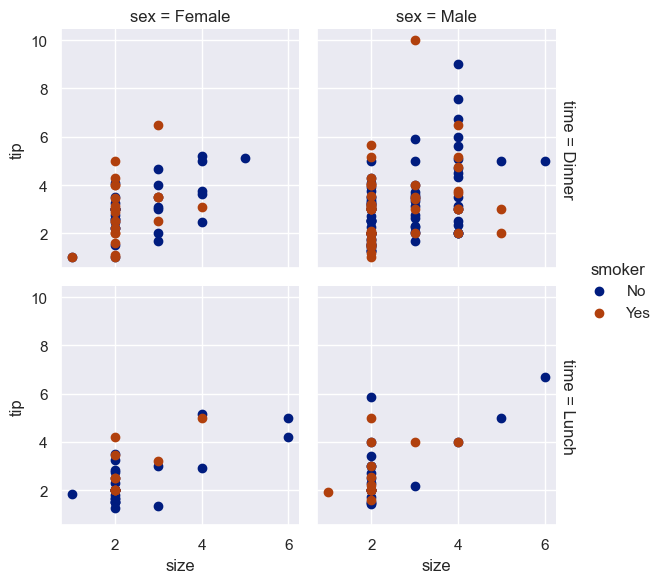

In [63]:
facet = sns.FacetGrid(df_gorjetas, col='sex', row='time', hue='smoker', margin_titles=True)
facet.map(plt.scatter, 'size', 'tip').add_legend()
plt.show()

In [53]:
df_gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [64]:
vinho_branco = pd.read_csv('Dados/winequality_white.csv', sep=';')
vinho_vermelho = pd.read_csv('Dados/winequality_red.csv', sep=';')

vinho_branco['wine_type'] = 'white'
vinho_vermelho['wine_type'] = 'red'

vinhos = pd.concat([vinho_vermelho, vinho_branco])
vinhos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


C:\Users\wilde\AppData\Local\Temp\ipykernel_18104\3055145123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinhos_acima_de_7['wine_type'] = pd.Categorical(vinhos_acima_de_7['wine_type'], categories=ordem, ordered=True)


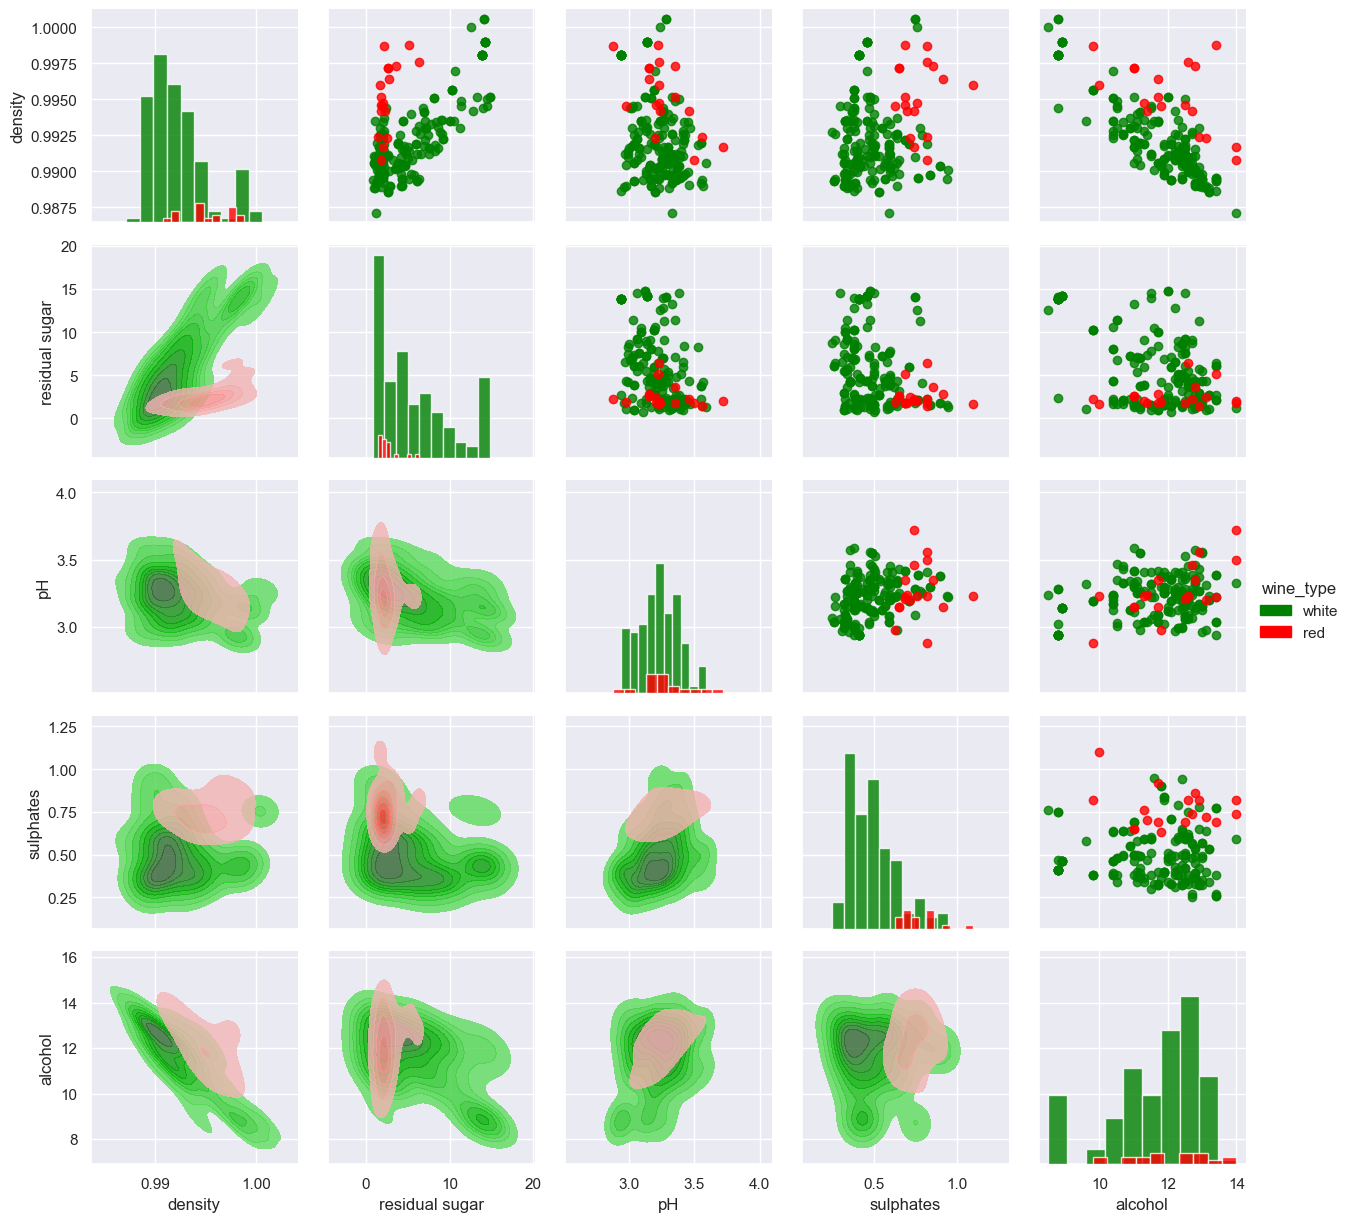

In [74]:
vinhos_acima_de_7 = vinhos[vinhos['quality'] > 7]
cores = dict( white = 'green',red = 'red')
ordem = ['white', 'red']
vinhos_acima_de_7['wine_type'] = pd.Categorical(vinhos_acima_de_7['wine_type'], categories=ordem, ordered=True)

grid = sns.PairGrid(vinhos_acima_de_7[['wine_type', 'density', 'residual sugar', 'pH', 'sulphates', 'alcohol']], hue='wine_type', palette=cores)
grid.map_upper(plt.scatter, alpha=0.8)
grid.map_diag(plt.hist, alpha=0.8)
grid.map_lower(sns.kdeplot, fill=True, alpha=0.8).add_legend()
plt.show()

# Desafio

In [76]:
df_aluguel = pd.read_csv('Dados/aluguel.csv')
df_aluguel = df_aluguel.drop(df_aluguel.columns[0], axis=1)
df_aluguel

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10606,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10607,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10608,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10609,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


## a) Construa um gráfico de relações pareadas que cruze as informações de número de quartos, número de banheiros, vagas de garagens e o total do aluguel. Pinte os dados pela cidade do imóvel. Responda: qual a cidade tem o aluguel mais caro para um imóvel de um quarto?


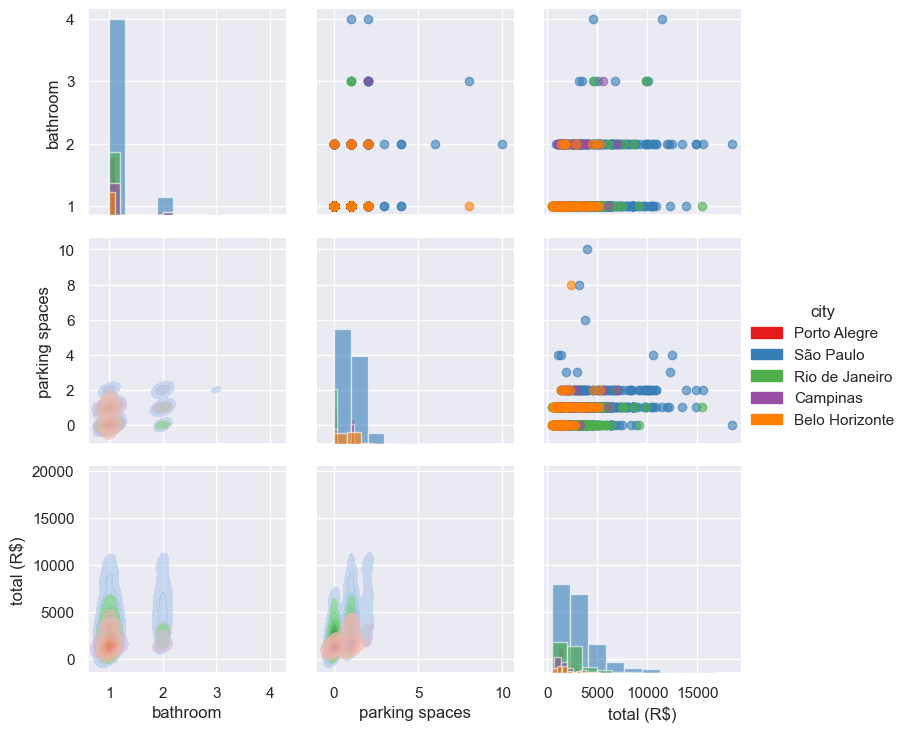

In [87]:
unico_quarto = df_aluguel[df_aluguel['rooms'] == 1]

grid = sns.PairGrid(unico_quarto[['bathroom', 'parking spaces', 'total (R$)', 'city']], hue='city', palette='Set1')
grid.map_upper(plt.scatter, alpha=0.6)
grid.map_diag(plt.hist, alpha=0.6)
grid.map_lower(sns.kdeplot, fill=True, alpha=0.6).add_legend()
plt.show()

### A cidade com o valor de aluguel mais caro é São Paulo.

## b) Construa um gráfico facetado por cidade mapeando o número de quartos que cada cidade tem. Use como visualização dos sugráficos a classe sns.countplot. Em seguida, identifique a quantidade de quartos mais frequente nos apartamentos disponíveis em cada uma das cidades.

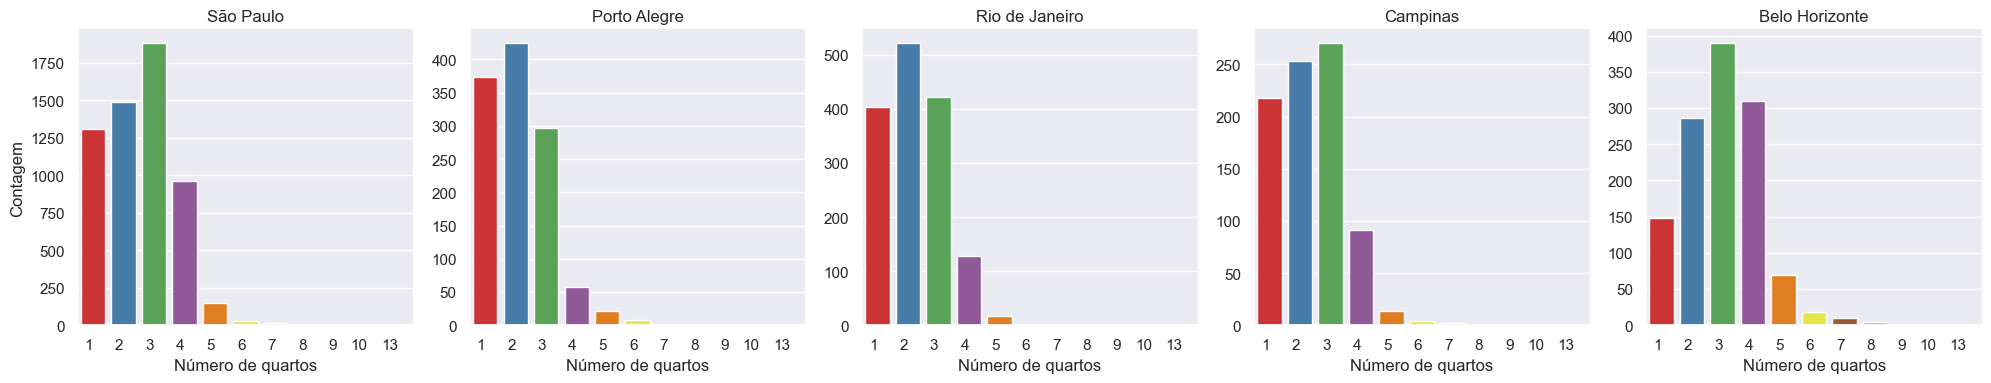

In [123]:
df_aluguel['rooms'] = df_aluguel['rooms'].astype(str)

ordem_quartos = sorted(df_aluguel['rooms'].astype(int).unique())

df_aluguel['rooms'] = pd.Categorical(df_aluguel['rooms'].astype(str), categories=[str(i) for i in ordem_quartos], ordered=True)

g = sns.FacetGrid(df_aluguel, col='city', col_wrap=6, height=4, sharey=False)
g.map_dataframe(sns.countplot,x='rooms', order=[str(i) for i in ordem_quartos], hue='rooms', palette='Set1',  dodge=False)
g.set_axis_labels('Número de quartos', 'Contagem')
g.set_titles(col_template='{col_name}')
g.set_xticklabels(ha='right')
plt.tight_layout()
plt.show()

### 3 Quartos em São Paulo, Campinas e Belo Horizonte e 2 quartos em Porto Alegre e Rio de Janeiro.

## c) Construa um gráfico facetado pelas cidades (colunas) e pela variável animal (linhas) com a distribuição do valor total do aluguel. Há alguma cidade onde o fato de o condomínio aceitar animais afeta o preço do aluguel?

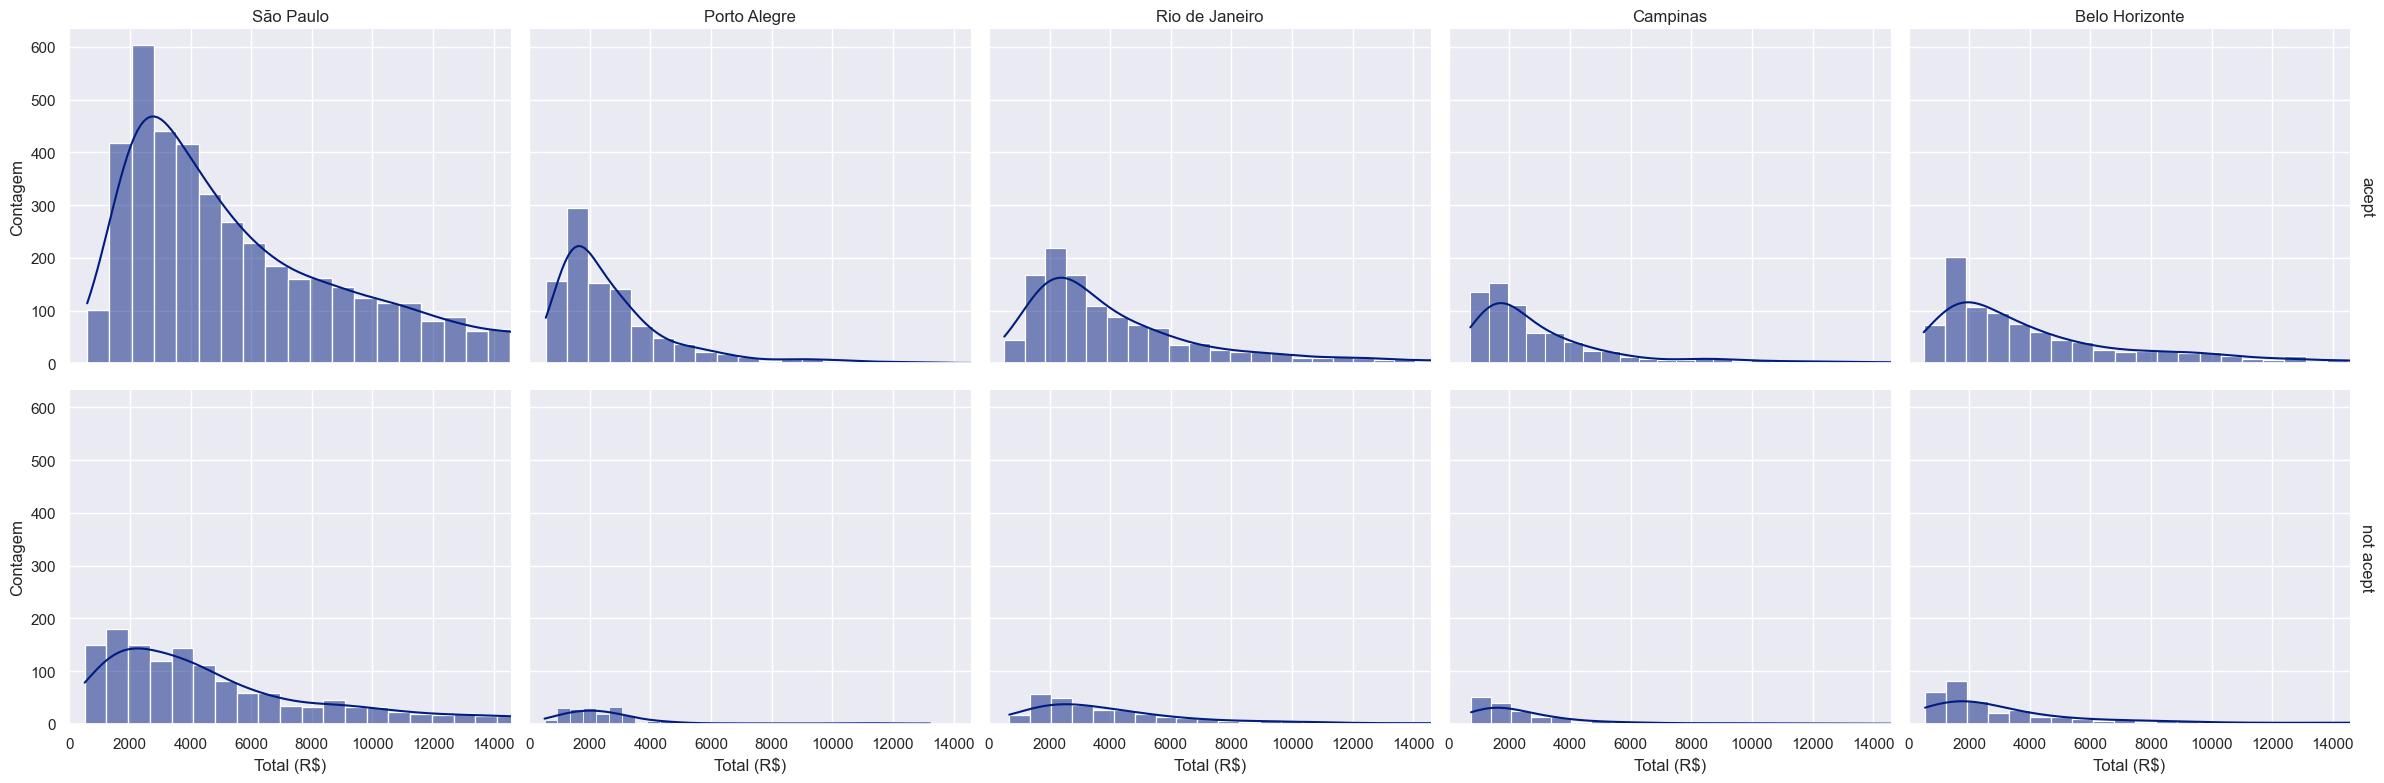

In [129]:
g = sns.FacetGrid(df_aluguel, col='city', row='animal', margin_titles=True, height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x='total (R$)', kde=True, bins=30)
g.set_axis_labels('Total (R$)', 'Contagem')
g.set_titles(row_template='{row_name}', col_template='{col_name}')
g.set(xlim=(0, df_aluguel['total (R$)'].quantile(0.95)))

plt.show()

### Não, pode-se dizer que os preços estão distribuídos igualmente, apesar de haver uma quantidade exorbitantemente maior de apartamentos que aceitem animais, dos que os que não. Em média até 2x mais.